# IEEE-CIS Fraud Detection
## Exploration Notebook 1

In [14]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the Data

In [15]:
X1 = pd.read_csv('data/train_transaction.csv') # transaction data
X2 = pd.read_csv('data/train_identity.csv') # id data
train = X1.merge(X2, on = 'TransactionID', how = 'left') # merging id and transaction data

In [17]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


### EDA

#### Output Variable

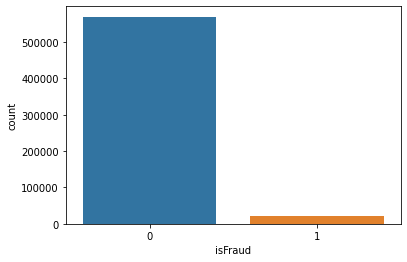

In [18]:
sns.countplot(data = train, x = 'isFraud')
plt.show()

In [21]:
train['isFraud'].value_counts(normalize = True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

We have an extremely imbalanced dataset. About 3.5% of the observations in the dataset are fraudulent transactions.

#### Transaction Features

**TransactionDT**: timedelta from a given reference datetime (not an actual timestamp)

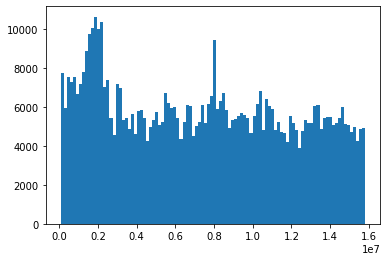

In [30]:
plt.hist(train['TransactionDT'], bins = 100) 
plt.show()

**TransactionAMT**: transaction payment amount in USD

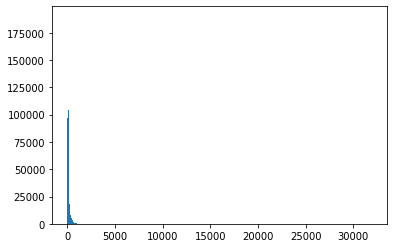

In [32]:
plt.hist(train['TransactionAmt'], bins = 100)
plt.show()

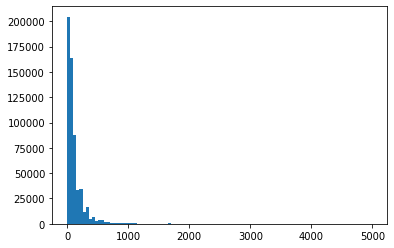

In [33]:
plt.hist(train[train['TransactionAmt'] < 5000]['TransactionAmt'], bins = 100) # only transactions less than $
plt.show()